# Ejercicio de Regresión Múltiple

## Autora
- **Sibyl González**
  - LinkedIn: [Sibyl González](https://www.linkedin.com/in/sibyl-gonzalez/)
  - Repositorio GitHub:https://github.com/sibylgonzalez.git

---

## Ejercicio 1: Productividad en la Elaboración de Coches

### Datos Sintéticos

Tomaremos datos sintéticos de productividad en la elaboración de coches, considerando dos variables: Horas trabajadas, Horas de descanso. El objetivo es predecir la cantidad de productos terminados.

### Pregunta a Resolver

¿Cuántos productos deberían terminarse cuando se trabajan 15 horas y han tenido 3 horas de descanso?

### Procedimiento

1. Importar las bibliotecas necesarias.
2. Cargar y explorar el conjunto de datos.
3. Realizar un modelo de regresión múltiple y graficar en 3D
4. Predecir la cantidad de productos terminados para un nuevo conjunto de datos.

##Ejercicio 2: Métricas de Performance del Call Center 311 en Chicago
Datos del Call Center 311 en Chicago

Para este segundo ejemplo, utilizaremos el conjunto de datos de métricas de performance del Call Center 311 en la ciudad de Chicago y seguiré el mismo procedimiento anterior

Fuente: Dataset en data.world




In [1]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 


In [2]:
#Importar datos
df = pd.read_excel ("/home/sibyl/Descargas/datos_producción.xlsx")
df.head ()


,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
0,1,42,2,28.925481
1,2,45,3,30.570058
2,3,30,2,21.132880
3,4,33,2,21.798530
4,5,33,3,19.343444


In [3]:

#Se seleccionan las variables

x1 = "Horas Trabajadas"
x2 = "Horas Descanso"
y = "Productos Terminados"

Coeficientes:  [ 0.50221005 -0.63991539]
Intercepción:  6.456509255157645
Ecuación del plano: y = 0.502 * Horas Trabajadas + -0.64 * Horas de Descanso + 6.457
Coeficiente de determinación:  0.797


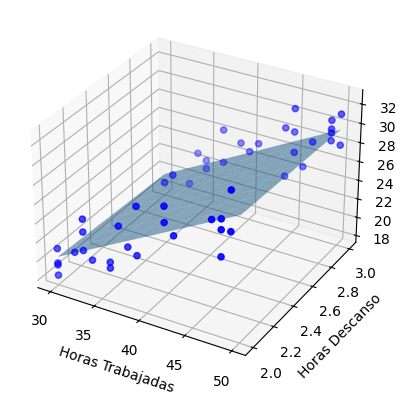

In [4]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Autos")
plt.show()

Los resultados obtenidos son:
1. **Coeficientes:**
   - El coeficiente asociado a "Horas Trabajadas" es 0.50221005.
   - El coeficiente asociado a "Horas de Descanso" es -0.63991539.


2. **Intercepción:**
   - La intercepción, o término independiente, es 6.456509255157645. Este valor es el valor estimado de la variable de respuesta cuando todas las variables predictoras son cero.

3. **Ecuación del Plano:**
   - Proporciona una forma concisa de expresar el modelo de regresión. En este caso, la ecuación es:
     \[ y = 0.502 \cdot \text{Horas Trabajadas} - 0.64 \cdot \text{Horas de Descanso} + 6.457 \]

   
4. **Coeficiente de Determinación (\(R^2\)):**
   - El coeficiente de determinación es 0.797. Este valor explica que capacidad tiene para predecir nuestro modelo, representa un 79,7% de capacidad de predecir correctamente

  
En resumen, el modelo indica que las "Horas Trabajadas" tienen un efecto positivo en la variable de respuesta, mientras que las "Horas de Descanso" tienen un efecto negativo.

In [5]:
#Se generan predicciones, pensamos en dos posibles situaciones
#si dejamos a los trabajadores trabajar 15 horas a la semana 
#con 3 horas de descanso, la prediccion de productos producidos sería:


horas_trabajadas_nuevas = 15 
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))


La predicción de productos producidos para 15 horas trabajadas y 3 horas de descanso es 12.07


Quiero probar ahora con otros datos sobre productividad de empleados, para ello voy a utilizar un dataset sobre Performance Metrics - 311 Call Center en la ciudad de Chicago.

Voy a tomar como variable objetivo Efficiency (7:00AM-3:00PM)y para las variables predictoras tomaré dos de las variables con mejor correlación con esta.

In [6]:
df = pd.read_csv("/home/sibyl/Descargas/performance-metrics-311-call-center-1.csv")
df.head()

,Sort,Dates,"Average Number of Operators, Mon-Fri, (7:00AM-3:00PM)","Average Number of Operators, Mon-Fri, (3:00PM-11:00PM)","Average Number of Operators, Mon-Fri, (11:00PM-7:00AM)","Average Number of Operators, Sat-Sun, (7:00AM-3:00PM)","Average Number of Operators, Sat-Sun, (3:00PM-11:00PM)","Average Number of Operators, Sat-Sun, (11:00PM-7:00AM)",Call Volume (7:00AM-3:00PM),Call Volume (3:00PM-11:00PM),...,Efficiency (11:00PM-7:00AM),Utilization (7:00AM-3:00PM),Utilization (3:00PM-11:00PM),Utilization (11:00PM-7:00AM),Abandoned (7:00AM-3:00PM),Abandoned (3:00PM-11:00PM),Abandoned (11:00PM-7:00AM),Average Wait Time (seconds): 7:00AM-3:00PM,Average Wait Time (seconds): 3:00PM-11:00PM,Average Wait Time (seconds): 11:00PM-7:00AM
0,270,7/25/16 - 7/31/16,19.0,8.0,2.0,11.0,7.0,3.0,44804.0,30477.0,...,91.0,81.0,80.0,45.0,28.0,24.0,10.0,119.0,100.0,17.0
1,269,7/18/16- 7/24/16,18.0,9.0,2.0,10.0,8.0,2.0,39145.0,38300.0,...,88.0,78.0,77.0,48.0,21.0,37.0,15.0,102.0,128.0,23.0
2,268,7/11/16- 7/17/16,18.0,11.0,3.0,12.0,7.0,1.0,37621.0,26681.0,...,93.0,77.0,76.0,39.0,22.0,16.0,8.0,107.0,53.0,7.0
3,267,7/4/16 - 7/10/16,18.0,10.0,2.0,12.0,9.0,2.0,35083.0,25567.0,...,91.0,72.0,74.0,49.0,21.0,13.0,12.0,104.0,37.0,13.0
4,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Sort', 'Dates',
       'Average Number of Operators, Mon-Fri, (7:00AM-3:00PM) ',
       'Average Number of Operators, Mon-Fri, (3:00PM-11:00PM) ',
       'Average Number of Operators, Mon-Fri, (11:00PM-7:00AM) ',
       'Average Number of Operators, Sat-Sun, (7:00AM-3:00PM) ',
       'Average Number of Operators, Sat-Sun, (3:00PM-11:00PM) ',
       'Average Number of Operators, Sat-Sun, (11:00PM-7:00AM) ',
       'Call Volume (7:00AM-3:00PM) ', 'Call Volume (3:00PM-11:00PM) ',
       'Call Volume (11:00PM-7:00AM) ', 'Efficiency (7:00AM-3:00PM) ',
       'Efficiency (3:00PM-11:00PM) ', 'Efficiency (11:00PM-7:00AM) ',
       'Utilization (7:00AM-3:00PM) ', 'Utilization (3:00PM-11:00PM) ',
       'Utilization (11:00PM-7:00AM) ', 'Abandoned (7:00AM-3:00PM) ',
       'Abandoned (3:00PM-11:00PM) ', 'Abandoned (11:00PM-7:00AM) ',
       'Average Wait Time (seconds): 7:00AM-3:00PM',
       'Average Wait Time (seconds): 3:00PM-11:00PM',
       'Average Wait Time (seconds): 11:00PM-7:00A

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


In [24]:
#Aqui busco obtener las variables con correlación significativa sin graficar
strong_correlations = correlation_matrix[(correlation_matrix['Efficiency (7:00AM-3:00PM) '] >= 0.70) | (correlation_matrix['Efficiency (7:00AM-3:00PM) '] <= -0.70)]

for col, correlation in strong_correlations['Efficiency (7:00AM-3:00PM) '].items():
    print(f'Columna: "{col}"')  # Imprime el nombre de la columna para depurar
    if col != 'Efficiency (7:00AM-3:00PM) ':
        print(f'Correlación con "{col}": {correlation:.2f}')
    else:
        print("No hay correlaciones fuertes con la variable objetivo")


Columna: "Efficiency (7:00AM-3:00PM) "
No hay correlaciones fuertes con la variable objetivo
Columna: "Efficiency (3:00PM-11:00PM) "
Correlación con "Efficiency (3:00PM-11:00PM) ": 0.83
Columna: "Abandoned (7:00AM-3:00PM) "
Correlación con "Abandoned (7:00AM-3:00PM) ": -0.80
Columna: "Average Wait Time (seconds): 7:00AM-3:00PM"
Correlación con "Average Wait Time (seconds): 7:00AM-3:00PM": -0.88
Columna: "Average Wait Time (seconds): 3:00PM-11:00PM"
Correlación con "Average Wait Time (seconds): 3:00PM-11:00PM": -0.75


Elijo la variable "Abandoned (7:00AM-3:00PM) " y "Average Wait Time (seconds): 7:00AM-3:00PM" para predecir la variable objetivo. Pero esas columnas necesitan tratamiento de nulos:

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Sort                                                     270 non-null    int64  
 1   Dates                                                    268 non-null    object 
 2   Average Number of Operators, Mon-Fri, (7:00AM-3:00PM)    268 non-null    float64
 3   Average Number of Operators, Mon-Fri, (3:00PM-11:00PM)   268 non-null    float64
 4   Average Number of Operators, Mon-Fri, (11:00PM-7:00AM)   268 non-null    float64
 5   Average Number of Operators, Sat-Sun, (7:00AM-3:00PM)    268 non-null    float64
 6   Average Number of Operators, Sat-Sun, (3:00PM-11:00PM)   268 non-null    float64
 7   Average Number of Operators, Sat-Sun, (11:00PM-7:00AM)   268 non-null    float64
 8   Call Volume (7:00AM-3:00PM)   

In [11]:
df.isnull().sum()

Sort                                                       0
Dates                                                      2
Average Number of Operators, Mon-Fri, (7:00AM-3:00PM)      2
Average Number of Operators, Mon-Fri, (3:00PM-11:00PM)     2
Average Number of Operators, Mon-Fri, (11:00PM-7:00AM)     2
Average Number of Operators, Sat-Sun, (7:00AM-3:00PM)      2
Average Number of Operators, Sat-Sun, (3:00PM-11:00PM)     2
Average Number of Operators, Sat-Sun, (11:00PM-7:00AM)     2
Call Volume (7:00AM-3:00PM)                                2
Call Volume (3:00PM-11:00PM)                               2
Call Volume (11:00PM-7:00AM)                               2
Efficiency (7:00AM-3:00PM)                                 2
Efficiency (3:00PM-11:00PM)                                2
Efficiency (11:00PM-7:00AM)                                2
Utilization (7:00AM-3:00PM)                                2
Utilization (3:00PM-11:00PM)                               2
Utilization (11:00PM-7:0

In [12]:
#Al tratarse solo de unos pocos nulos por columna, realizon un borrado de NaNs
df.dropna(inplace=True)

In [13]:
#Se seleccionan las variables

x1 = "Abandoned (7:00AM-3:00PM) "
x2 = "Average Wait Time (seconds): 7:00AM-3:00PM"
y = 'Efficiency (7:00AM-3:00PM) '

Coeficientes:  [-0.13751868 -0.20712612]
Intercepción:  98.61147382612796
Ecuación del plano: y = -0.138 * Llamadas abandonadas + -0.207 * Tiempo de espera en seg + 98.611
Coeficiente de determinación:  0.772


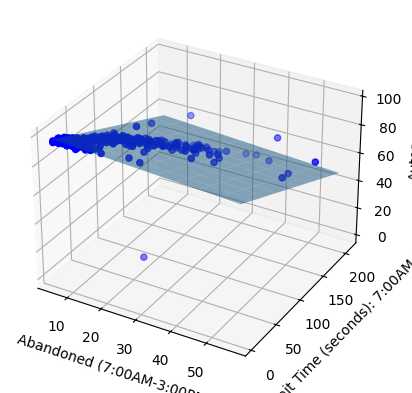

In [14]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Llamadas abandonadas + {} * Tiempo de espera en seg + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Autos")
plt.show()


1. **Coeficientes:**
   - El coeficiente asociado a "Llamadas abandonadas" es -0.13751868.
   - El coeficiente asociado a "Tiempo de espera en seg" es -0.20712612.


2. **Intercepción:**
   - La intercepción es 98.61147382612796. 

3. **Ecuación del Plano:**

     \[ \text{Efficiency} = -0.138 \cdot \text{Llamadas abandonadas} - 0.207 \cdot \text{Tiempo de espera en seg} + 98.611 \]

   Esta ecuación indica cómo las variables predictoras están relacionadas con la eficiencia, a menores llamadas abandonadas y tiempo de espera en segundos, mayor eficiencia.

4. **Coeficiente de Determinación (\(R^2\)):**
   - Es un valor relativamente alto, lo que sugiere que el modelo tiene un buen ajuste a los datos.



In [21]:

#Predicciones
abandoned_nuevas = 20
wait_time_nuevas = 25

prediccion_nueva = pd.DataFrame({x1: [abandoned_nuevas], x2: [wait_time_nuevas]})
eficiency_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de la eficiencia es', abandoned_nuevas, 'llamadas abandonadas y', wait_time_nuevas, "wait_time_nuevas", round(eficiency_prediccion[0], 3))


La predicción de la eficiencia es 20 llamadas abandonadas y 25 wait_time_nuevas 90.683


Por cada 20 llamadas abandonadas y un tiempo de 25 segundos de espera la eficiencia queda en 90%. Esto nos da una idea de cómo pueden usar sus indicadores en los call center para prestar sus servicios de manera mas productiva. Fin del ejercicio.

In [25]:
#################################################################